<a href="https://colab.research.google.com/github/codingCapricorn/CORONA_Analysis/blob/master/CORONA_Virus_Time_Series_Recovery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#CORONA VIRUS TIME SERIES RECOVERY ANALYSIS USING MACHINE LEARNING 

Dataset ::: Recovered CoViD-19 cases from 1/22/20 TO 6/13/20

File Name :: (csse_covid_19_time_series)
time_series_covid19_recovered_global.csv

URL :: https://github.com/CSSEGISandData/COVID-19

Dataset is taken from John Hopkins University Github .... https://github.com/CSSEGISandData


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/time_series_covid19_recovered_global.csv')

In [39]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 148 entries, Province/State to 6/13/20
dtypes: float64(2), int64(144), object(2)
memory usage: 292.7+ KB


In [41]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
6/9/20              int64
6/10/20             int64
6/11/20             int64
6/12/20             int64
6/13/20             int64
Length: 148, dtype: object

In [42]:
df.shape

(253, 148)

In [43]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.00000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,19.801381,28.168223,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,0.565217,0.877470,1.122530,1.865613,2.462451,3.367589,4.442688,5.877470,7.948617,10.339921,12.822134,15.596838,18.509881,20.355731,24.881423,31.849802,37.134387,42.944664,49.735178,56.727273,63.719368,71.845850,74.664032,90.458498,92.466403,99.711462,110.296443,120.094862,131.529644,145.102767,...,4724.984190,4906.478261,5062.592885,5206.948617,5418.604743,5551.387352,5737.134387,5883.517787,6104.237154,6261.292490,6450.972332,6674.652174,6836.256917,7045.339921,7251.525692,7484.383399,7687.011858,8116.462451,8333.739130,8552.869565,8804.73913,9022.976285,9273.541502,9537.798419,9843.438735,10121.984190,10423.596838,10640.573123,11052.126482,11364.940711,11641.735178,11915.079051,12200.462451,12418.221344,13017.422925,13342.561265,13655.363636,13994.845850,14281.727273,14617.802372
std,24.558602,67.091761,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,5.723862,8.965366,10.730686,18.737687,24.543684,33.234187,40.512413,52.353924,71.396899,92.314954,115.039106,142.186509,168.753592,173.039104,221.634660,303.958894,357.566163,421.564533,498.638310,578.156053,654.435905,745.897395,752.783139,966.865535,970.251872,1058.564980,1198.039408,1323.412019,1474.934197,1664.413409,...,19494.552625,19978.871506,20484.071780,20882.881677,21697.292233,22079.422118,22939.221721,23143.713867,23986.315941,24380.453072,24893.335847,25882.107992,26287.369533,27064.270067,27619.385978,28240.731083,28790.176180,31330.460373,32170.480029,32733.684198,33552.81762,34216.751594,34975.223599,35867.190174,36748.207869,37721.051661,39298.163614,40177.498372,41234.613442,42552.757588,43486.844156,44391.544775,45385.270037,46080.182589,49367.550747,50619.617774,51853.086506,53053.696884,54130.290761,55312.990097
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [44]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20',
       '6/11/20', '6/12/20', '6/13/20'],
      dtype='object', length=148)

In [45]:
for j in range(1,148):
       print(df.iloc[:, j].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Grenada' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, Sout

In [46]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0]

In [47]:
df.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/9/20              0
6/10/20             0
6/11/20             0
6/12/20             0
6/13/20             0
Length: 148, dtype: int64

In [48]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.00000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,19.801381,28.168223,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,0.565217,0.877470,1.122530,1.865613,2.462451,3.367589,4.442688,5.877470,7.948617,10.339921,12.822134,15.596838,18.509881,20.355731,24.881423,31.849802,37.134387,42.944664,49.735178,56.727273,63.719368,71.845850,74.664032,90.458498,92.466403,99.711462,110.296443,120.094862,131.529644,145.102767,...,4724.984190,4906.478261,5062.592885,5206.948617,5418.604743,5551.387352,5737.134387,5883.517787,6104.237154,6261.292490,6450.972332,6674.652174,6836.256917,7045.339921,7251.525692,7484.383399,7687.011858,8116.462451,8333.739130,8552.869565,8804.73913,9022.976285,9273.541502,9537.798419,9843.438735,10121.984190,10423.596838,10640.573123,11052.126482,11364.940711,11641.735178,11915.079051,12200.462451,12418.221344,13017.422925,13342.561265,13655.363636,13994.845850,14281.727273,14617.802372
std,24.558602,67.091761,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,5.723862,8.965366,10.730686,18.737687,24.543684,33.234187,40.512413,52.353924,71.396899,92.314954,115.039106,142.186509,168.753592,173.039104,221.634660,303.958894,357.566163,421.564533,498.638310,578.156053,654.435905,745.897395,752.783139,966.865535,970.251872,1058.564980,1198.039408,1323.412019,1474.934197,1664.413409,...,19494.552625,19978.871506,20484.071780,20882.881677,21697.292233,22079.422118,22939.221721,23143.713867,23986.315941,24380.453072,24893.335847,25882.107992,26287.369533,27064.270067,27619.385978,28240.731083,28790.176180,31330.460373,32170.480029,32733.684198,33552.81762,34216.751594,34975.223599,35867.190174,36748.207869,37721.051661,39298.163614,40177.498372,41234.613442,42552.757588,43486.844156,44391.544775,45385.270037,46080.182589,49367.550747,50619.617774,51853.086506,53053.696884,54130.290761,55312.990097
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

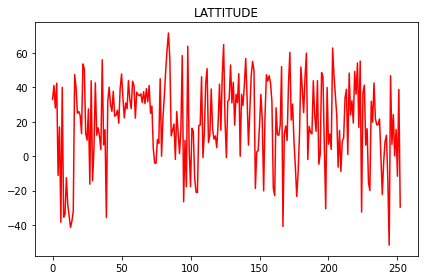

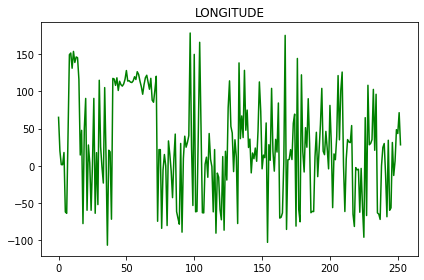

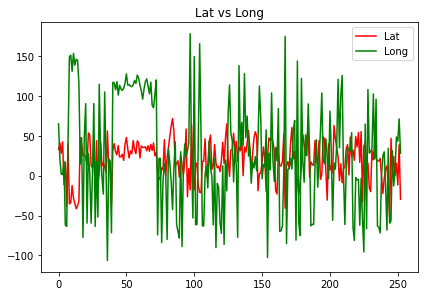

In [74]:
df.Lat.plot(title='LATTITUDE',color='r') 
plt.tight_layout()
plt.show()   

df.Long.plot(title='LONGITUDE',color='g') 
plt.tight_layout()
plt.show()   

df.Lat.plot(color='r', legend=True)
df.Long.plot(color='g', legend=True) 
plt.tight_layout()
plt.title("Lat vs Long")
plt.show()   


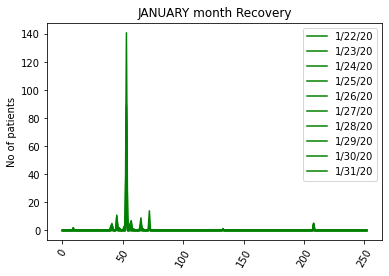

In [227]:
df['1/22/20'].plot(color='g', legend=True)
df['1/23/20'].plot(color='g', legend=True)
df['1/24/20'].plot(color='g', legend=True)
df['1/25/20'].plot(color='g', legend=True)
df['1/26/20'].plot(color='g', legend=True)
df['1/27/20'].plot(color='g', legend=True)
df['1/28/20'].plot(color='g', legend=True)
df['1/29/20'].plot(color='g', legend=True)
df['1/30/20'].plot(color='g', legend=True)
df['1/31/20'].plot(color='g', legend=True)
plt.xticks(rotation=60)
plt.ylabel('No of patients')
plt.title('JANUARY month Recovery')
plt.show()

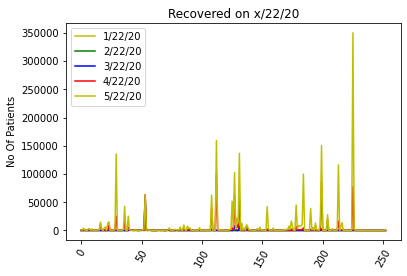

In [88]:
df['1/22/20'].plot(color='y', legend=True)
df['2/22/20'].plot(color='g', legend=True)
df['3/22/20'].plot(color='b', legend=True)
df['4/22/20'].plot(color='r', legend=True)
df['5/22/20'].plot(color='y', legend=True)
#plt.show()
plt.xticks(rotation=60)
plt.ylabel('No Of Patients')
plt.title('Recovered on x/22/20')
plt.show()

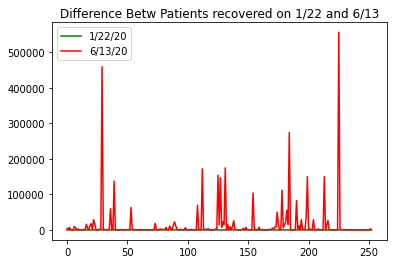

In [228]:
df['1/22/20'].plot(color='g', legend=True)
df['6/13/20'].plot(color='r', legend=True)
plt.title("Difference Betw Patients recovered on 1/22 and 6/13")
plt.show()


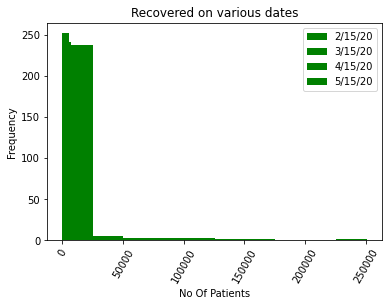

In [229]:
df['2/15/20'].plot(kind='hist',color='g', legend=True)
df['3/15/20'].plot(kind='hist',color='g', legend=True)
df['4/15/20'].plot(kind='hist',color='g', legend=True)
df['5/15/20'].plot(kind='hist',color='g', legend=True)
plt.xticks(rotation=60)
plt.xlabel('No Of Patients')
plt.title('Recovered on various dates')
plt.show()

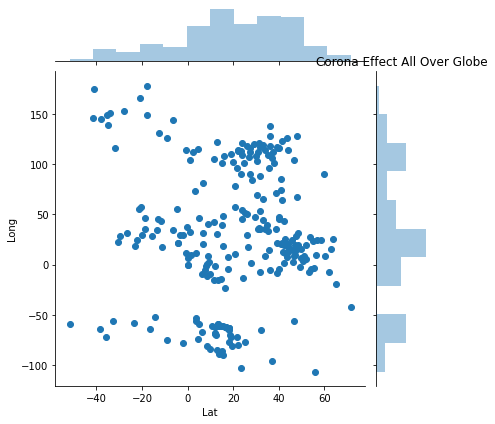

In [230]:
data_returns = df
sns.jointplot(x='Lat', y='Long', data=data_returns)  
plt.title("Corona Effect All Over Globe")
plt.show()

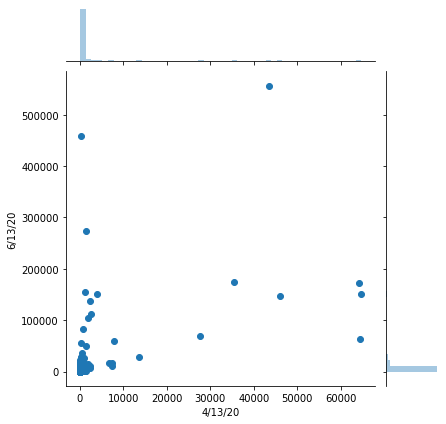

In [189]:
data_returns = df
sns.jointplot(x='4/13/20', y='6/13/20', data=data_returns)  

plt.show()

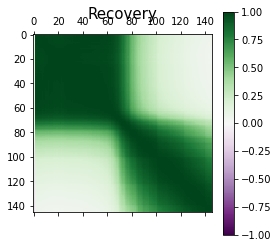

In [196]:
plt.matshow(df.corr(method='pearson'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Recovery', size=15)
plt.colorbar()
plt.show()

In [197]:
df['Country/Region'].value_counts().sort_values()

Bosnia and Herzegovina     1
Latvia                     1
Afghanistan                1
Libya                      1
Kazakhstan                 1
                          ..
Netherlands                5
Australia                  8
United Kingdom            11
France                    11
China                     33
Name: Country/Region, Length: 188, dtype: int64

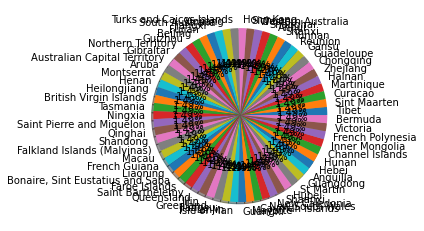

In [202]:
y=df['Province/State'].value_counts()
plt.pie(y,labels=y.index,autopct="%0.2f%%",shadow=True)
plt.show()

In [203]:
y=df['Province/State'].value_counts()
y

Tibet               1
Sint Maarten        1
Curacao             1
Martinique          1
Hainan              1
                   ..
Channel Islands     1
Inner Mongolia      1
French Polynesia    1
Victoria            1
Bermuda             1
Name: Province/State, Length: 67, dtype: int64

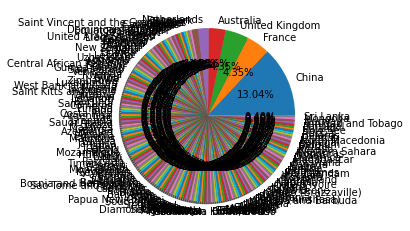

In [204]:
y=df['Country/Region'].value_counts()
plt.pie(y,labels=y.index,autopct="%0.2f%%",shadow=True)
plt.show()

In [205]:
y=df['Country/Region'].value_counts()
y

China                  33
France                 11
United Kingdom         11
Australia               8
Netherlands             5
                       ..
Portugal                1
Trinidad and Tobago     1
Norway                  1
Mongolia                1
Sri Lanka               1
Name: Country/Region, Length: 188, dtype: int64

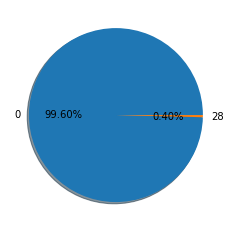

In [206]:
y=df['1/22/20'].value_counts()
plt.pie(y,labels=y.index,autopct="%0.2f%%",shadow=True)
plt.show()

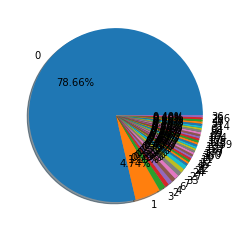

In [207]:
y=df['2/13/20'].value_counts()
plt.pie(y,labels=y.index,autopct="%0.2f%%",shadow=True)
plt.show()

In [208]:
p=df.pivot_table(index='Country/Region',columns='5/10/20')
p

1/22/20                       ...   Long                     
5/10/20             0      1      2      3       ... 105186 136166 144400 216169
Country/Region                                   ...                            
Afghanistan            NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Albania                NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Algeria                NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Andorra                NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Angola                 NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
...                    ...    ...    ...    ...  ...    ...    ...    ...    ...
West Bank and Gaza     NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Western Sahara         NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Yemen                  NaN    0.0    NaN    NaN  ...    NaN    NaN    NaN    NaN
Zambia                 NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
Zimbabwe               NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN

[188 rows x 29870 columns]

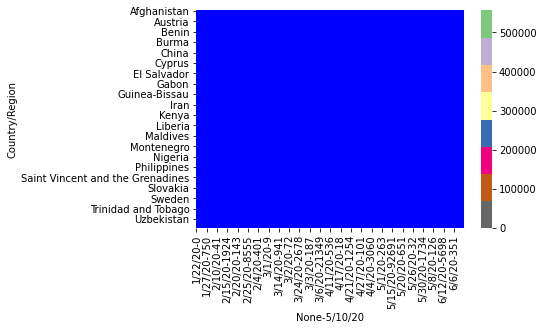

In [211]:
sns.heatmap(p,linewidths=5,linecolor='blue',cmap='Accent_r')
plt.show()

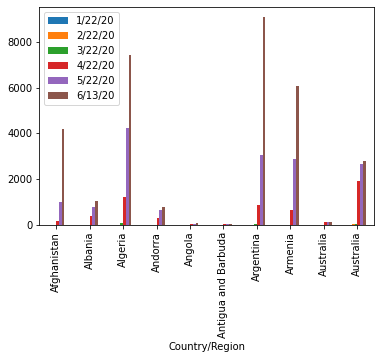

In [212]:
df[:10].plot.bar(x='Country/Region',y=['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/13/20'])

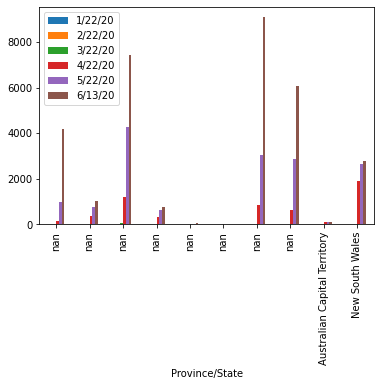

In [213]:
df[:10].plot.bar(x='Province/State',y=['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/13/20'])

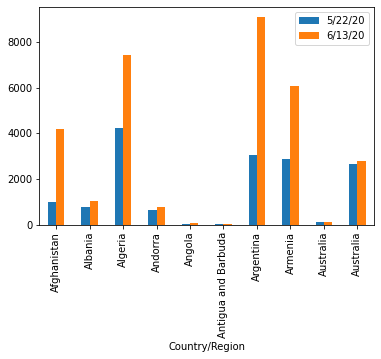

In [216]:
df[:10].plot.bar(x='Country/Region',y=['5/22/20','6/13/20'])

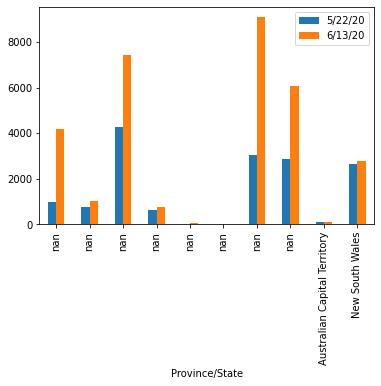

In [217]:
df[:10].plot.bar(x='Province/State',y=['5/22/20','6/13/20'])

In [218]:
df['Province/State'].isnull().sum()


186

In [219]:
chart_df = df.drop(['Province/State','Lat', 'Long'],axis=1)
chart_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61


In [220]:
chart_df.shape


(253, 145)

In [221]:
chart_df.columns


Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20',
       '6/11/20', '6/12/20', '6/13/20'],
      dtype='object', length=145)

In [222]:
chart_df['Country/Region'].value_counts()


China                  33
France                 11
United Kingdom         11
Australia               8
Netherlands             5
                       ..
Portugal                1
Trinidad and Tobago     1
Norway                  1
Mongolia                1
Sri Lanka               1
Name: Country/Region, Length: 188, dtype: int64

In [223]:
chart_df.head(10)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1472,1524,1601,1659,1728,1757,1837,1862,2266,2385,2497,2534,2569,2625,2872,2933,3032,3062,3530,3732,3999,4167,4349,4617,4788,4788,5336,5521,5709,5896,5993,6088,6180,6909,7305,7568,7991,8332,8743,9083
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1111,1135,1185,1218,1267,1325,1359,1430,1500,1572,1666,1791,1925,2019,2164,2419,2581,2874,2936,3064,3145,3220,3255,3287,3297,3317,3386,3402,3427,3454,3468,3513,3720,4014,4099,4451,5226,5466,5639,6081
8,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103,103,103,103,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
9,Australia,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,2418,2463,2486,2504,2504,2517,2543,2571,2595,2605,2611,2611,2612,2614,2631,2648,2648,2653,2653,2656,2661,2663,2670,2666,2683,2685,2685,2687,2691,2700,2714,2719,2723,2724,2729,2735,2738,2743,2763,2766


In [224]:
chart_df = chart_df.groupby('Country/Region').agg(np.sum)
chart_df = chart_df.reset_index()
chart_df.head(10)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1472,1524,1601,1659,1728,1757,1837,1862,2266,2385,2497,2534,2569,2625,2872,2933,3032,3062,3530,3732,3999,4167,4349,4617,4788,4788,5336,5521,5709,5896,5993,6088,6180,6909,7305,7568,7991,8332,8743,9083
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1111,1135,1185,1218,1267,1325,1359,1430,1500,1572,1666,1791,1925,2019,2164,2419,2581,2874,2936,3064,3145,3220,3255,3287,3297,3317,3386,3402,3427,3454,3468,3513,3720,4014,4099,4451,5226,5466,5639,6081
8,Australia,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,10,10,10,10,11,11,11,11,11,11,11,11,11,...,5975,6031,6078,6122,6141,6167,6213,6270,6297,6334,6359,6364,6392,6413,6431,6470,6478,6485,6508,6531,6552,6560,6579,6576,6605,6614,6618,6626,6636,6648,6683,6688,6703,6706,6720,6740,6759,6782,6803,6838
9,Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13462,13639,13698,13836,13928,13991,14061,14148,14304,14405,14471,14524,14563,14614,14678,14882,14951,15005,15037,15063,15138,15182,15228,15286,15347,15520,15593,15596,15629,15672,15717,15742,15789,15793,15839,15875,15910,15949,15985,16012


In [225]:
chart_df.shape


(188, 145)

In [0]:
chart_df.to_csv('bar_chart_race.csv')
